# Shipping Optimization Challenge

In [2]:
# imports
import pandas as pd
import numpy as np

## 1. Load the data

In [4]:
train_df = pd.read_csv('train_2_pr.csv')

# print the shape
print(train_df.shape)

# print the head
train_df.head()

(5114, 14)


,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,shipping_time
0,0,S000720,2019-06-08 07:17:51,A,Y,GB,IN,88.61,355.0,0.75,Air,SC3,Y,5.00741
1,1,S000725,2019-07-12 15:23:21,A,Y,GB,IN,85.65,105.0,0.90,Ocean,SC1,Y,21.41215
2,2,S000736,2019-10-04 14:23:29,A,Y,GB,IN,86.22,100.0,0.75,Air,SC3,Y,5.33692
3,3,S000738,2020-01-07 09:19:50,A,Y,GB,IN,94.43,1071.0,1.05,Air,SC2,Y,5.14792
4,4,S000739,2020-04-11 06:36:03,A,Y,GB,IN,94.24,2007.0,0.75,Air,SC3,Y,5.03067


## 2. Cleaning, EDA and Pre-processing

In [50]:
# Automated EDA with Pandas Profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(train_df, title='Pandas Profiling Report')

# show in notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
profile.to_file("EDA_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
# get unique values
train_df.nunique()

Unnamed: 0             5114
shipment_id            4805
send_timestamp         4804
pick_up_point             1
drop_off_point            2
source_country            1
destination_country       2
freight_cost           2000
gross_weight           1301
shipment_charges          5
shipment_mode             2
shipping_company          3
selected                  1
shipping_time          4315
dtype: int64

In [53]:
# drop the following columns: shipment_id, pickup_point, source_country, selected because they only have 1 value
train_df.drop(['Unnamed: 0', 'shipment_id', 'pick_up_point', 'source_country', 'selected'], axis=1, inplace=True)

# print the df shape
print(train_df.shape)

# print the df head
train_df.head()

(5114, 9)


,send_timestamp,drop_off_point,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,2019-06-08 07:17:51,Y,IN,88.61,355.0,0.75,Air,SC3,5.00741
1,2019-07-12 15:23:21,Y,IN,85.65,105.0,0.90,Ocean,SC1,21.41215
2,2019-10-04 14:23:29,Y,IN,86.22,100.0,0.75,Air,SC3,5.33692
3,2020-01-07 09:19:50,Y,IN,94.43,1071.0,1.05,Air,SC2,5.14792
4,2020-04-11 06:36:03,Y,IN,94.24,2007.0,0.75,Air,SC3,5.03067


Now, I will encode the categorical variables

In [54]:
# Encode the following categorical variables into numeric ones: drop_off_point, destination_country, shipment_mode, shipping_company

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

colums_to_encode = ['drop_off_point', 'destination_country', 'shipment_mode', 'shipping_company']

# Encode 'travel_from' and 'car_type' columns
for column in colums_to_encode:
    train_df[column + '_encoded'] = label_encoder.fit_transform(train_df[column])
    # drop the column
    train_df.drop(column, axis=1, inplace=True)

# print the df shape
print(train_df.shape)

# print the df head
train_df.head()

(5114, 9)


,send_timestamp,freight_cost,gross_weight,shipment_charges,shipping_time,drop_off_point_encoded,destination_country_encoded,shipment_mode_encoded,shipping_company_encoded
0,2019-06-08 07:17:51,88.61,355.0,0.75,5.00741,1,1,0,2
1,2019-07-12 15:23:21,85.65,105.0,0.90,21.41215,1,1,1,0
2,2019-10-04 14:23:29,86.22,100.0,0.75,5.33692,1,1,0,2
3,2020-01-07 09:19:50,94.43,1071.0,1.05,5.14792,1,1,0,1
4,2020-04-11 06:36:03,94.24,2007.0,0.75,5.03067,1,1,0,2


In [55]:
# check unique values
train_df.nunique()

send_timestamp                 4804
freight_cost                   2000
gross_weight                   1301
shipment_charges                  5
shipping_time                  4315
drop_off_point_encoded            2
destination_country_encoded       2
shipment_mode_encoded             2
shipping_company_encoded          3
dtype: int64

Check for empty cells

In [56]:
# check for null values
train_df.isnull().sum()

send_timestamp                 0
freight_cost                   0
gross_weight                   0
shipment_charges               0
shipping_time                  0
drop_off_point_encoded         0
destination_country_encoded    0
shipment_mode_encoded          0
shipping_company_encoded       0
dtype: int64

In [57]:
# Assuming 'send_timestamp' is in a train_dfFrame named 'train_df'
train_df['send_timestamp'] = pd.to_datetime(train_df['send_timestamp'])  # Convert to datetime if not already in datetime format

# # get the day of year column from the send_timestamp column
train_df['day_of_year_sent'] = train_df['send_timestamp'].dt.dayofyear

# Extracting hour, minute, second
train_df['hour'] = train_df['send_timestamp'].dt.hour
train_df['minute'] = train_df['send_timestamp'].dt.minute
train_df['second'] = train_df['send_timestamp'].dt.second

# Applying cyclical encoding (sine and cosine transformations) for cyclical patterns
train_df['hour_sin'] = np.sin(2 * np.pi * train_df['hour'] / 24.0)
train_df['hour_cos'] = np.cos(2 * np.pi * train_df['hour'] / 24.0)

train_df['minute_sin'] = np.sin(2 * np.pi * train_df['minute'] / 60.0)
train_df['minute_cos'] = np.cos(2 * np.pi * train_df['minute'] / 60.0)

train_df['second_sin'] = np.sin(2 * np.pi * train_df['second'] / 60.0)
train_df['second_cos'] = np.cos(2 * np.pi * train_df['second'] / 60.0)

# Drop the original 'send_timestamp' column, as well as the hour, minute, second columns
train_df.drop('send_timestamp', axis=1, inplace=True)
train_df.drop('hour', axis=1, inplace=True)
train_df.drop('minute', axis=1, inplace=True)
train_df.drop('second', axis=1, inplace=True)

# print the df shape
print(train_df.shape)

# print the df head
train_df.head()

(5114, 15)


,freight_cost,gross_weight,shipment_charges,shipping_time,drop_off_point_encoded,destination_country_encoded,shipment_mode_encoded,shipping_company_encoded,day_of_year_sent,hour_sin,hour_cos,minute_sin,minute_cos,second_sin,second_cos
0,88.61,355.0,0.75,5.00741,1,1,0,2,159,0.965926,-2.588190e-01,0.978148,-0.207912,-0.809017,0.587785
1,85.65,105.0,0.90,21.41215,1,1,1,0,193,-0.707107,-7.071068e-01,0.669131,-0.743145,0.809017,-0.587785
2,86.22,100.0,0.75,5.33692,1,1,0,2,277,-0.500000,-8.660254e-01,0.669131,-0.743145,0.104528,-0.994522
3,94.43,1071.0,1.05,5.14792,1,1,0,1,7,0.707107,-7.071068e-01,0.913545,-0.406737,-0.866025,0.500000
4,94.24,2007.0,0.75,5.03067,1,1,0,2,102,1.000000,6.123234e-17,-0.587785,-0.809017,0.309017,0.951057


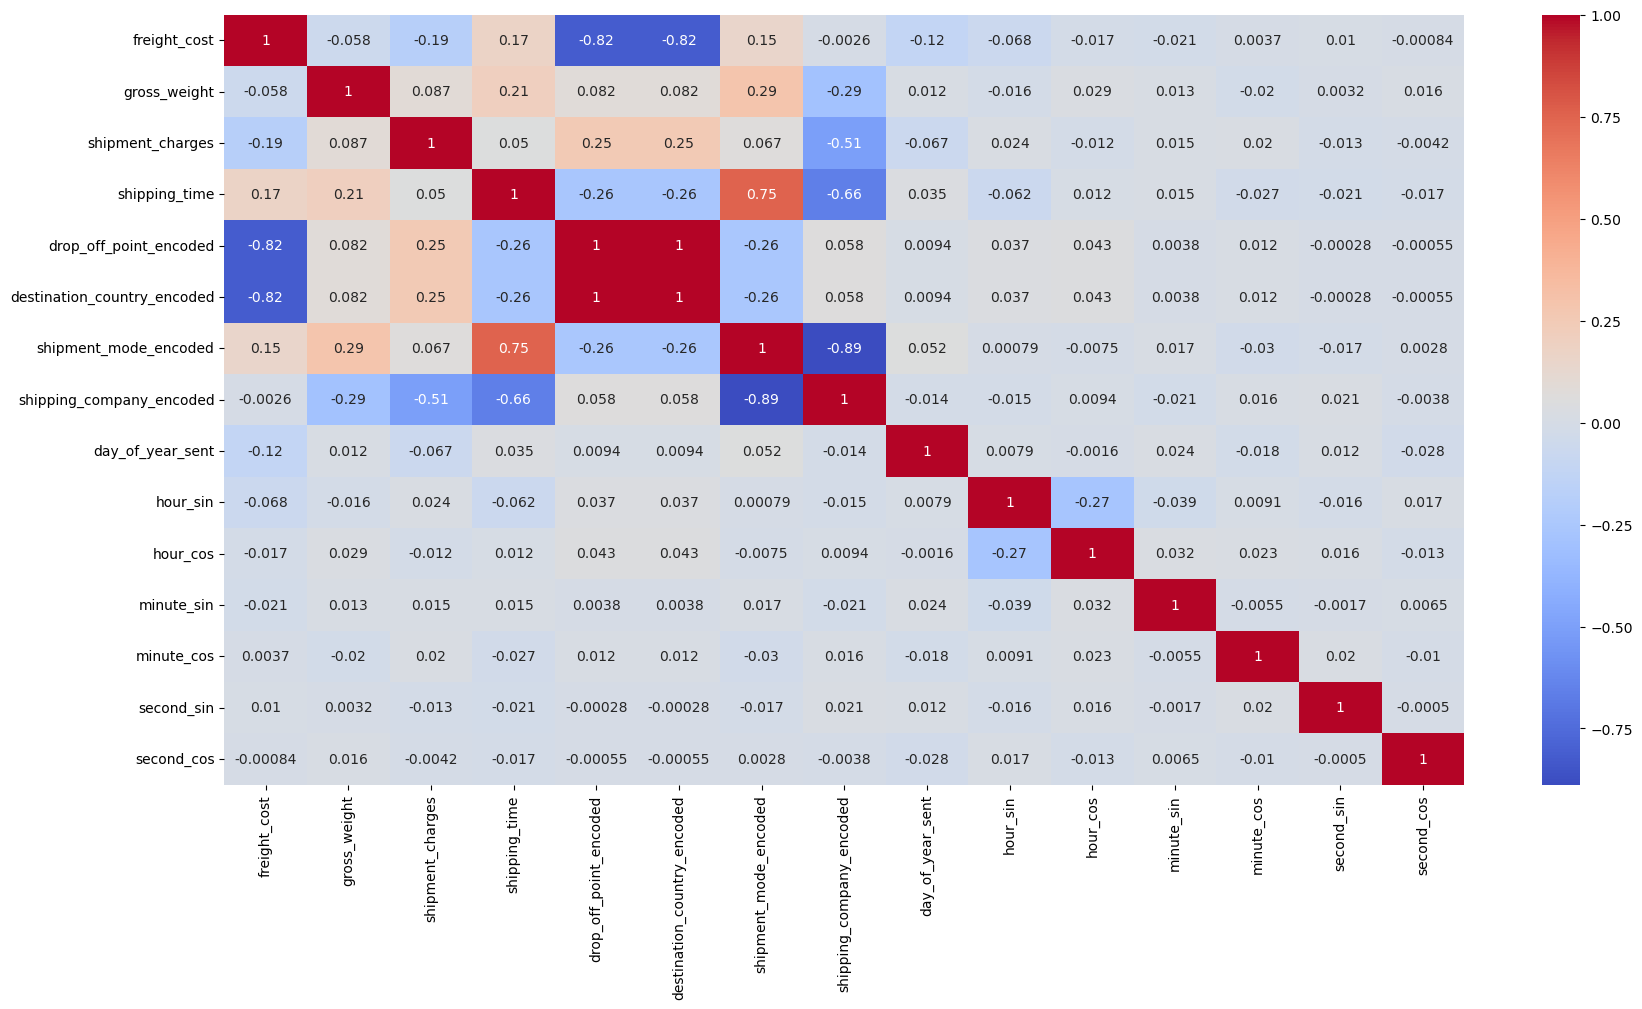

In [58]:
# check correlation between variables using heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [59]:
# The following variables are highly correlated:
# 1. drop_off_point_encoded and destination_country_encoded
# 2. shipping_company_encoded and shipment_mode_encoded
# 3. freight_cost with destination_country_encoded and drop_off_point_encoded

# drop the following columns: drop_off_point_encoded, shipping_company_encoded, destination_country_encoded, hour_cos
train_df.drop(['drop_off_point_encoded',
               'hour_cos'
            #    'shipping_company_encoded',
            #    'destination_country_encoded'
               ], axis=1, inplace=True)

# print the df shape
print(train_df.shape)

# print the df head
train_df.head()

(5114, 13)


,freight_cost,gross_weight,shipment_charges,shipping_time,destination_country_encoded,shipment_mode_encoded,shipping_company_encoded,day_of_year_sent,hour_sin,minute_sin,minute_cos,second_sin,second_cos
0,88.61,355.0,0.75,5.00741,1,0,2,159,0.965926,0.978148,-0.207912,-0.809017,0.587785
1,85.65,105.0,0.90,21.41215,1,1,0,193,-0.707107,0.669131,-0.743145,0.809017,-0.587785
2,86.22,100.0,0.75,5.33692,1,0,2,277,-0.500000,0.669131,-0.743145,0.104528,-0.994522
3,94.43,1071.0,1.05,5.14792,1,0,1,7,0.707107,0.913545,-0.406737,-0.866025,0.500000
4,94.24,2007.0,0.75,5.03067,1,0,2,102,1.000000,-0.587785,-0.809017,0.309017,0.951057


/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


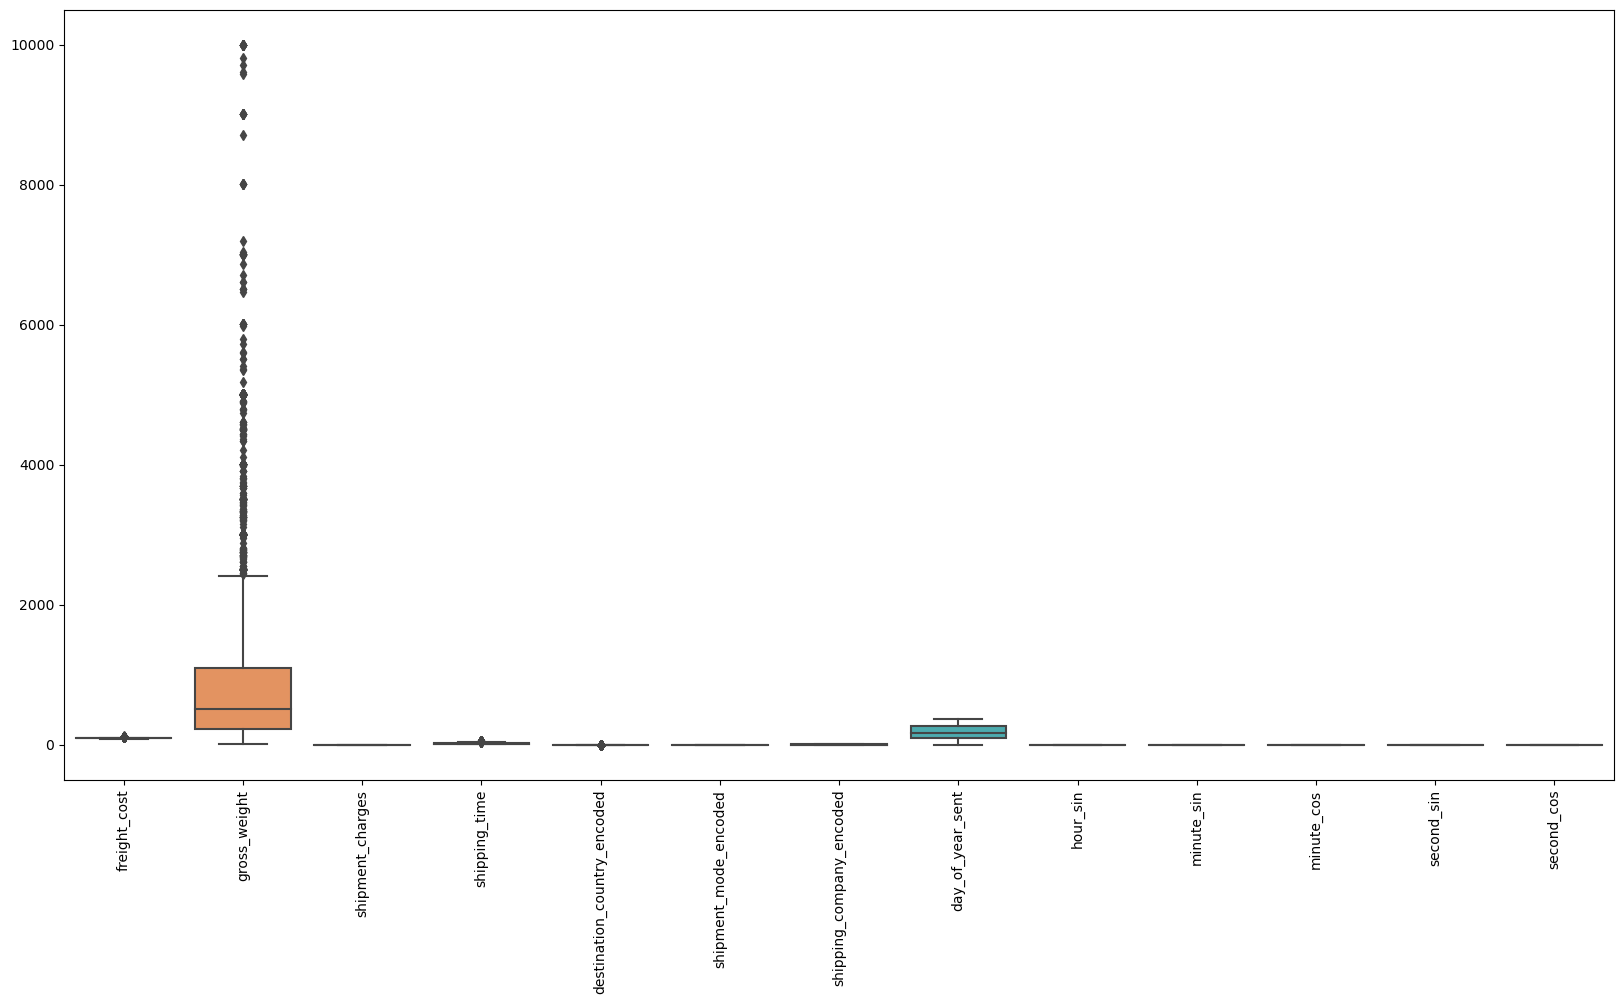

In [60]:
# check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df)
plt.xticks(rotation=90)
plt.show()


In [61]:
# drop gross_weight outliers
# train_df = train_df[train_df['gross_weight'] < 6000]

# drop gross_weight
# train_df.drop('gross_weight', axis=1, inplace=True)

# scale the gross_weight column and the freight_cost column and send_day_of_year column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df['gross_weight'] = scaler.fit_transform(train_df[['gross_weight']])
train_df['freight_cost'] = scaler.fit_transform(train_df[['freight_cost']])
train_df['day_of_year_sent'] = scaler.fit_transform(train_df[['day_of_year_sent']])

# print the df shape
print(train_df.shape)

# print the df head
train_df.head()

(5114, 13)


,freight_cost,gross_weight,shipment_charges,shipping_time,destination_country_encoded,shipment_mode_encoded,shipping_company_encoded,day_of_year_sent,hour_sin,minute_sin,minute_cos,second_sin,second_cos
0,-0.502717,-0.473210,0.75,5.00741,1,0,2,-0.178622,0.965926,0.978148,-0.207912,-0.809017,0.587785
1,-1.077047,-0.670686,0.90,21.41215,1,1,0,0.159260,-0.707107,0.669131,-0.743145,0.809017,-0.587785
2,-0.966450,-0.674635,0.75,5.33692,1,0,2,0.994026,-0.500000,0.669131,-0.743145,0.104528,-0.994522
3,0.626539,0.092360,1.05,5.14792,1,0,1,-1.689151,0.707107,0.913545,-0.406737,-0.866025,0.500000
4,0.589673,0.831709,0.75,5.03067,1,0,2,-0.745070,1.000000,-0.587785,-0.809017,0.309017,0.951057


/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benson/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


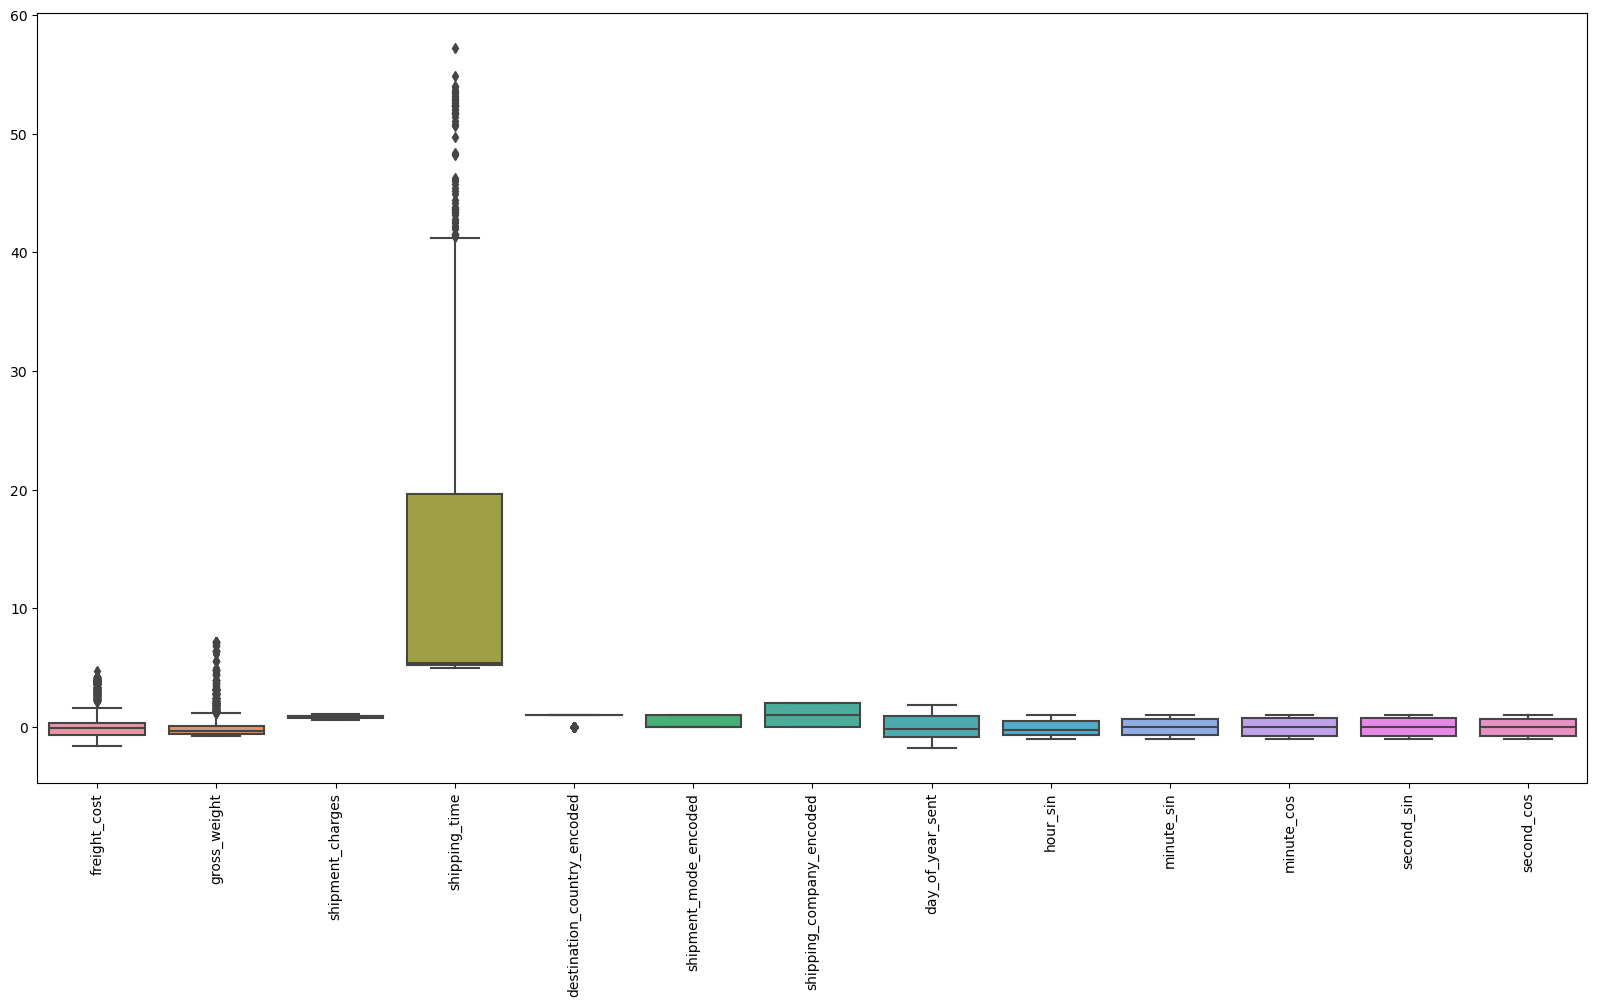

In [62]:
# check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df)
plt.xticks(rotation=90)
plt.show()


In [63]:
# check for duplicate rows
train_df.duplicated().sum()

0

In [64]:
# make a copy of the df
final_df = train_df

# print the df head
final_df.head()

,freight_cost,gross_weight,shipment_charges,shipping_time,destination_country_encoded,shipment_mode_encoded,shipping_company_encoded,day_of_year_sent,hour_sin,minute_sin,minute_cos,second_sin,second_cos
0,-0.502717,-0.473210,0.75,5.00741,1,0,2,-0.178622,0.965926,0.978148,-0.207912,-0.809017,0.587785
1,-1.077047,-0.670686,0.90,21.41215,1,1,0,0.159260,-0.707107,0.669131,-0.743145,0.809017,-0.587785
2,-0.966450,-0.674635,0.75,5.33692,1,0,2,0.994026,-0.500000,0.669131,-0.743145,0.104528,-0.994522
3,0.626539,0.092360,1.05,5.14792,1,0,1,-1.689151,0.707107,0.913545,-0.406737,-0.866025,0.500000
4,0.589673,0.831709,0.75,5.03067,1,0,2,-0.745070,1.000000,-0.587785,-0.809017,0.309017,0.951057


## Model Training

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets (80% train, 20% test)
X = final_df.drop('shipping_time', axis=1)  # Features
y = final_df['shipping_time']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
# SVM model

from sklearn.svm import SVR

# Initializing the SVM model
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels (linear, rbf, poly)

# Training the SVM model
svm_model.fit(X_train, y_train)

SVR()

In [127]:
from sklearn.metrics import mean_squared_error

# Predicting with SVM model
svm_predictions = svm_model.predict(X_test)

# Evaluating model performance
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print(f"SVM Mean Squared Error (MSE): {svm_mse}")
print(f"SVM Root Mean Squared Error (RMSE): {svm_rmse}")

SVM Mean Squared Error (MSE): 50.02683225365311
SVM Root Mean Squared Error (RMSE): 7.07296488423724


In [68]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 5, 10],  # Regularization parameter
    'gamma': [0.001, 0.01, 1],  # Kernel coefficient for RBF
    'kernel': ['rbf', 'sigmoid']  # Kernel type
}

# Initialize the SVM model
svm_model = SVR()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict using the best model
best_svm_model = grid_search.best_estimator_
svm_predictions = best_svm_model.predict(X_test)

# Evaluate model performance
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print(f"Improved SVM Mean Squared Error (MSE): {svm_mse}")
print(f"Improved SVM Root Mean Squared Error (RMSE): {svm_rmse}")


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Improved SVM Mean Squared Error (MSE): 48.863685435983925
Improved SVM Root Mean Squared Error (RMSE): 6.990256464249644


SVM Tuning

In [154]:
# SVM model

from sklearn.svm import SVR

# Initializing the SVM model
final_svm_model = SVR(kernel='rbf', C= 10, gamma=0.01)  # You can experiment with different kernels (linear, rbf, poly)

# Training the SVM model
final_svm_model.fit(X_train, y_train)

SVR(C=10, gamma=0.01)

In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting with SVM model
svm_predictions = final_svm_model.predict(X_test)

# Evaluating model performance
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM Mean Squared Error (MSE): {svm_mse}")
print(f"SVM Root Mean Squared Error (RMSE): {svm_rmse}")
print(f"SVM Mean Absolute Error (MAE): {svm_mae}")
print(f"SVM R2 Score: {svm_r2}")

SVM Mean Squared Error (MSE): 48.863685435983925
SVM Root Mean Squared Error (RMSE): 6.990256464249644
SVM Mean Absolute Error (MAE): 3.9636555278829353
SVM R2 Score: 0.5548585161654551


In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

# Define the parameter distribution to search
param_dist = {
    'C': reciprocal(0.1, 15),  # Random distribution for 'C'
    'gamma': reciprocal(0.01, 10),  # Random distribution for 'gamma'
    'kernel': ['rbf', 'linear']  # Kernel type
}

# Initialize the SVM model
svm_model = SVR()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=10, random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Predict using the best model
best_svm_model = random_search.best_estimator_
svm_predictions = best_svm_model.predict(X_test)

# Evaluate model performance
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
print(f"Improved SVM Mean Squared Error (MSE): {svm_mse}")
print(f"Improved SVM Root Mean Squared Error (RMSE): {svm_rmse}")


Best Parameters: {'C': 13.151669089586505, 'gamma': 0.0499245341692398, 'kernel': 'linear'}
Improved SVM Mean Squared Error (MSE): 49.18693105802111
Improved SVM Root Mean Squared Error (RMSE): 7.013339508252906


Now we will make the Neural Network

In [158]:
# make a NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# define the model
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[12]),  # Update input shape to (None, 5)
    layers.Dense(12, activation='relu'),
    layers.Dense(1)
])

# compile the model
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae', 'mse']
)

# fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100
)

# evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/100
128/128 [==============================] - 6s 16ms/step - loss: 9.3707 - mae: 9.3707 - mse: 186.7384 - val_loss: 7.2157 - val_mae: 7.2157 - val_mse: 143.1306
Epoch 2/100
128/128 [==============================] - 1s 11ms/step - loss: 6.1698 - mae: 6.1698 - mse: 110.5186 - val_loss: 5.6409 - val_mae: 5.6409 - val_mse: 100.3298
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 5.1286 - mae: 5.1286 - mse: 79.4166 - val_loss: 5.1130 - val_mae: 5.1130 - val_mse: 78.2537
Epoch 4/100
128/128 [==============================] - 0s 4ms/step - loss: 4.7211 - mae: 4.7211 - mse: 64.0088 - val_loss: 4.8137 - val_mae: 4.8137 - val_mse: 68.1921
Epoch 5/100
128/128 [==============================] - 1s 4ms/step - loss: 4.4249 - mae: 4.4249 - mse: 56.5032 - val_loss: 4.5710 - val_mae: 4.5710 - val_mse: 62.0131
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 4.1644 - mae: 4.1644 - mse: 51.9466 - val_loss: 4.3317 - val_mae: 4.3317 - val_mse: 

[3.9715282917022705, 3.9715282917022705, 49.41778564453125]

32/32 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): [3.9715282917022705, 3.9715282917022705, 49.41778564453125]
Root Mean Squared Error (RMSE): [1.99286936 1.99286936 7.02977849]
Mean Absolute Error (MAE): 3.971528664249185
R2 Score: 0.5498107371649763


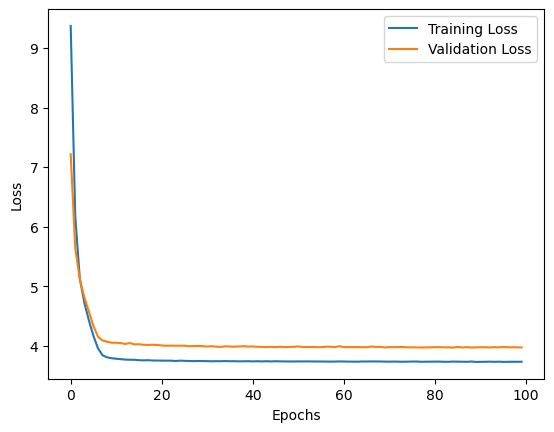

In [159]:
import matplotlib.pyplot as plt

# Evaluating model performance
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, model.predict(X_test))
r2_score = r2_score(y_test, model.predict(X_test))
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2_score}")

# Plotting training/validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Neural Network tuning

1. Adjust Model Architecture (Adding Dropout)

In [74]:
# make a NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ! adjust the layers as need be
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[12]),  # Update input shape to match your feature count
    layers.Dropout(0.2),  # Adding dropout to the first hidden layer
    layers.Dense(12, activation='relu'),
    layers.Dense(1)
])


# compile the model
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae', 'mse']
)

# fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100
)

# evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 7.5484 - mae: 7.5484 - mse: 138.8465 - val_loss: 5.1579 - val_mae: 5.1579 - val_mse: 71.4915
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 4.7126 - mae: 4.7126 - mse: 56.4778 - val_loss: 4.3986 - val_mae: 4.3986 - val_mse: 52.1798
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 4.2758 - mae: 4.2758 - mse: 48.1720 - val_loss: 4.1968 - val_mae: 4.1968 - val_mse: 51.2747
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 4.1492 - mae: 4.1492 - mse: 46.7015 - val_loss: 4.1256 - val_mae: 4.1256 - val_mse: 50.9336
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 4.1178 - mae: 4.1178 - mse: 47.4057 - val_loss: 4.1225 - val_mae: 4.1225 - val_mse: 50.6077
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 4.0975 - mae: 4.0975 - mse: 46.8275 - val_loss: 4.0564 - val_mae: 4.0564 - val_mse: 50.42

[4.055957794189453, 4.055957794189453, 51.09320831298828]

32/32 [==============================] - 0s 1ms/step - loss: 4.0560 - mae: 4.0560 - mse: 51.0932
Mean Squared Error (MSE): [4.055957794189453, 4.055957794189453, 51.09320831298828]
Root Mean Squared Error (RMSE): [2.01394086 2.01394086 7.14795134]


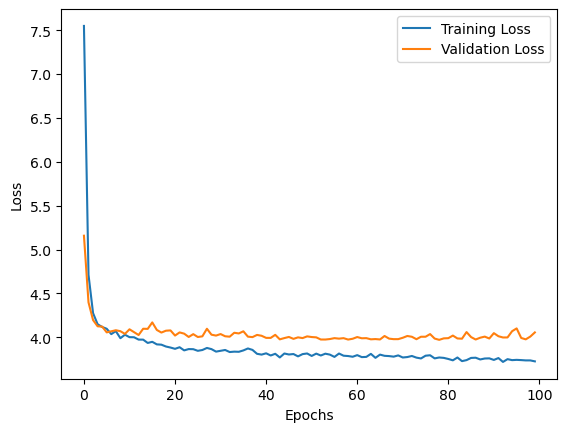

In [75]:
import matplotlib.pyplot as plt

# Evaluating model performance
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting training/validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. Optimization Techniques (Using Different Optimizers and Learning Rate Scheduling)

In [76]:
# make a NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ! adjust the layers as need be
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[12]),  # Update input shape to match your feature count
    layers.Dropout(0.2),  # Adding dropout to the first hidden layer
    layers.Dense(12, activation='relu'),
    layers.Dense(1)
])


# Example of using a different optimizer (RMSprop) and adding learning rate scheduling
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mae', metrics=['mae', 'mse'])

# Learning Rate Scheduling (ReduceLROnPlateau callback)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=0.0001)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# evaluate the model
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 5.0770 - mae: 5.0770 - mse: 73.8859


[5.076963901519775, 5.076963901519775, 73.88587188720703]

In [149]:
# Evaluating model performance
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

32/32 [==============================] - 0s 3ms/step - loss: 3.9619 - mae: 3.9619 - mse: 49.5770
Mean Squared Error (MSE): [3.9618654251098633, 3.9618654251098633, 49.57695770263672]
Root Mean Squared Error (RMSE): [1.99044352 1.99044352 7.04109066]


3. Early Stopping (Using EarlyStopping Callback)

In [89]:
# make a NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ! adjust the layers as need be
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[12]),  # Update input shape to match your feature count
    layers.Dropout(0.2),  # Adding dropout to the first hidden layer
    layers.Dense(12, activation='relu'),
    layers.Dense(1)
])


# Example of using a different optimizer (RMSprop) and adding learning rate scheduling
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mae', metrics=['mae', 'mse'])

# Early Stopping with patience set to stop training when the validation loss stops improving
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stopping])


# evaluate the model
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 5.1018 - mae: 5.1018 - mse: 66.9033


[5.101824760437012, 5.101824760437012, 66.90327453613281]

In [148]:
# Evaluating model performance
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

32/32 [==============================] - 0s 6ms/step - loss: 3.9619 - mae: 3.9619 - mse: 49.5770
Mean Squared Error (MSE): [3.9618654251098633, 3.9618654251098633, 49.57695770263672]
Root Mean Squared Error (RMSE): [1.99044352 1.99044352 7.04109066]


## Explore my best model

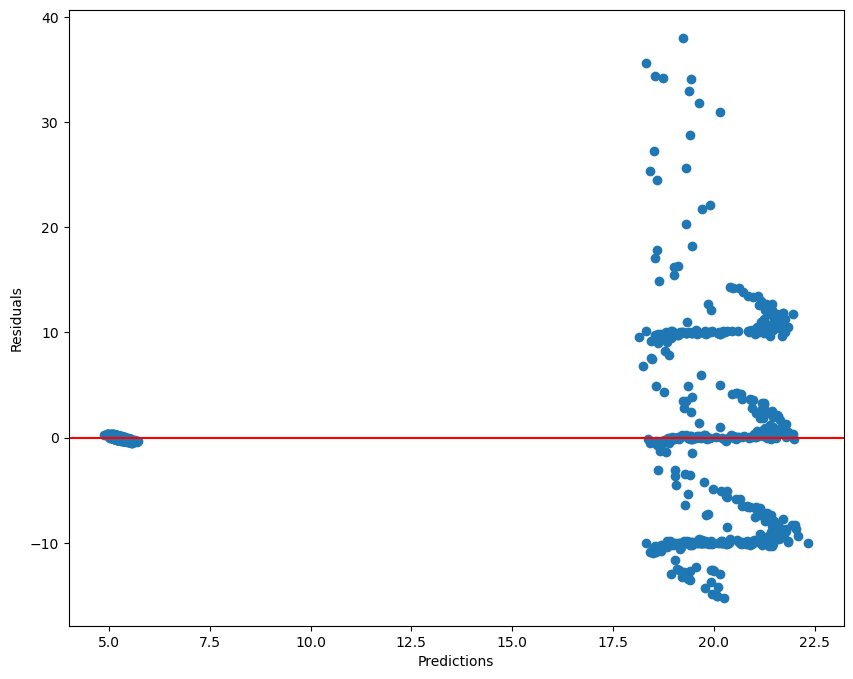

In [150]:
# Because my final_svm_model is my best, I will plot residuals for it
# Plotting residuals
plt.figure(figsize=(10, 8))
plt.scatter(x=svm_predictions, y=y_test - svm_predictions)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


## Predict
Based on the above, the final_SVM_model is my best model, I will use it to make my predictions

In [130]:
# import and display the test_2.csv file
test_df = pd.read_csv('test_2.csv')

# print the df shape
print(test_df.shape)

# print the df head
test_df.head()

(1260, 13)


,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected
0,0,S002736,2019-10-04 14:27:04,A,Y,GB,IN,86.81,100.0,0.75,Air,SC3,Y
1,1,S002738,2020-01-07 09:39:35,A,Y,GB,IN,94.43,1006.0,0.75,Air,SC3,Y
2,2,S005739,2020-04-11 11:58:10,A,Y,GB,IN,93.55,321.0,1.05,Air,SC2,Y
3,3,S008722,2019-06-23 11:54:41,A,Y,GB,IN,88.74,355.0,1.05,Air,SC2,Y
4,4,S009737,2019-11-20 20:18:01,A,Y,GB,IN,92.83,115.0,1.05,Air,SC2,Y


In [131]:
# make the changes to the test_df that were made to the training one
# drop the following columns: shipment_id, pickup_point, source_country, selected because they only have 1 value
test_df.drop(['Unnamed: 0', 'shipment_id', 'pick_up_point', 'source_country', 'selected'], axis=1, inplace=True)

# # Encode the following categorical variables into numeric ones: drop_off_point, destination_country, shipment_mode, shipping_company
colums_to_encode = ['drop_off_point', 'destination_country', 'shipment_mode', 'shipping_company']

# Encode 'travel_from' and 'car_type' columns
for column in colums_to_encode:
    test_df[column + '_encoded'] = label_encoder.fit_transform(test_df[column])
    # drop the column
    test_df.drop(column, axis=1, inplace=True)

# get the day of year column from the send_timestamp column
test_df['send_timestamp'] = pd.to_datetime(test_df['send_timestamp'])  # Convert to datetime if not already in datetime format

# get the day of year column from the send_timestamp column
test_df['day_of_year_sent'] = test_df['send_timestamp'].dt.dayofyear

# Extracting hour, minute, second
test_df['hour'] = test_df['send_timestamp'].dt.hour
test_df['minute'] = test_df['send_timestamp'].dt.minute
test_df['second'] = test_df['send_timestamp'].dt.second

# Applying cyclical encoding (sine and cosine transformations) for cyclical patterns
test_df['hour_sin'] = np.sin(2 * np.pi * test_df['hour'] / 24.0)
# test_df['hour_cos'] = np.cos(2 * np.pi * test_df['hour'] / 24.0)

test_df['minute_sin'] = np.sin(2 * np.pi * test_df['minute'] / 60.0)
test_df['minute_cos'] = np.cos(2 * np.pi * test_df['minute'] / 60.0)

test_df['second_sin'] = np.sin(2 * np.pi * test_df['second'] / 60.0)
test_df['second_cos'] = np.cos(2 * np.pi * test_df['second'] / 60.0)

# Drop the original 'send_timestamp' column, as well as the hour, minute, second columns
test_df.drop('send_timestamp', axis=1, inplace=True)
test_df.drop('hour', axis=1, inplace=True)
test_df.drop('minute', axis=1, inplace=True)
test_df.drop('second', axis=1, inplace=True)

# drop drop off point encoded
test_df.drop('drop_off_point_encoded', axis=1, inplace=True)

# scale the gross_weight column and the freight_cost column and send_day_of_year column

test_df['gross_weight'] = scaler.fit_transform(test_df[['gross_weight']])
test_df['freight_cost'] = scaler.fit_transform(test_df[['freight_cost']])
test_df['day_of_year_sent'] = scaler.fit_transform(test_df[['day_of_year_sent']])

# print the df shape
print(test_df.shape)

# print the df head
test_df.head()

(1260, 12)


,freight_cost,gross_weight,shipment_charges,destination_country_encoded,shipment_mode_encoded,shipping_company_encoded,day_of_year_sent,hour_sin,minute_sin,minute_cos,second_sin,second_cos
0,-0.857283,-0.655580,0.75,1,0,2,0.950624,-0.500000,0.309017,-0.951057,0.406737,0.913545
1,0.643164,0.016892,0.75,1,0,2,-1.697783,0.707107,-0.809017,-0.587785,-0.500000,-0.866025
2,0.469884,-0.491544,1.05,1,0,1,-0.765936,0.258819,-0.207912,0.978148,0.866025,0.500000
3,-0.477248,-0.466308,1.05,1,0,1,-0.059694,0.258819,-0.587785,0.809017,-0.913545,-0.406737
4,0.328110,-0.644446,1.05,1,0,1,1.411643,-0.866025,0.951057,-0.309017,0.104528,0.994522


In [132]:
# with my test_df as my X, predict the shipping time
test_predictions = final_svm_model.predict(test_df)

# print the predictions
print(test_predictions)

[ 5.1983236   5.22173045  5.18848975 ... 19.72545797 18.9379961
 19.15871632]


In [134]:
# make a df out of the initial test_df's shipment_id column and the predictions
test_predictions_df = pd.DataFrame(pd.read_csv('test_2.csv')['shipment_id'])
test_predictions_df['shipping_time'] = test_predictions

# print the df shape
print(test_predictions_df.shape)

# print the df head
test_predictions_df.head()

(1260, 2)


,shipment_id,shipping_time
0,S002736,5.198324
1,S002738,5.221730
2,S005739,5.188490
3,S008722,5.151506
4,S009737,5.420550


In [135]:
# save the df as a csv file called submission.csv
test_predictions_df.to_csv('submission.csv', index=False)

### Out Of Challenge and Coursework Scope
I will attempt other models for increased performance
1. Multi-linear regression
2. Decision tree
3. Random Forest
4. XGBoost, LightBoost and CatBoost
5. Lasso regression model
6. KNN model
7. Gaussian model


In [156]:
# make a multiple linear regression model
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict using the model
linear_predictions = linear_model.predict(X_test)

# Evaluating model performance
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, linear_predictions)

print(f"Linear Regression Mean Squared Error (MSE): {linear_mse}")
print(f"Linear Regression Root Mean Squared Error (RMSE): {linear_rmse}")
print(f"Linear Regression Mean Absolute Error (MAE): {linear_mae}")

Linear Regression Mean Squared Error (MSE): 47.410224058359006
Linear Regression Root Mean Squared Error (RMSE): 6.885508264344689
Linear Regression Mean Absolute Error (MAE): 4.215050984704281


In [137]:
# make a decision tree model
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
tree_model = DecisionTreeRegressor()

# Train the model
tree_model.fit(X_train, y_train)

# Predict using the model
tree_predictions = tree_model.predict(X_test)

# Evaluating model performance
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)

print(f"Decision Tree Mean Squared Error (MSE): {tree_mse}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {tree_rmse}")

Decision Tree Mean Squared Error (MSE): 93.26478625735132
Decision Tree Root Mean Squared Error (RMSE): 9.657369530951549


In [138]:
# make a random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
forest_model = RandomForestRegressor()

# Train the model
forest_model.fit(X_train, y_train)

# Predict using the model
forest_predictions = forest_model.predict(X_test)

# Evaluating model performance
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)

print(f"Random Forest Mean Squared Error (MSE): {forest_mse}")
print(f"Random Forest Root Mean Squared Error (RMSE): {forest_rmse}")

Random Forest Mean Squared Error (MSE): 48.26718703353946
Random Forest Root Mean Squared Error (RMSE): 6.9474590343189115


In [160]:
# make XGBoost, LightBoost and CatBoost models
# !pip install xgboost, lightgbm, catboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Initialize the models
xgb_model = XGBRegressor()
lgb_model = LGBMRegressor()
cat_model = CatBoostRegressor()

# Train the models
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Predict using the models
xgb_predictions = xgb_model.predict(X_test)
lgb_predictions = lgb_model.predict(X_test)
cat_predictions = cat_model.predict(X_test)

# Evaluating model performance
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)

lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_rmse = np.sqrt(lgb_mse)

cat_mse = mean_squared_error(y_test, cat_predictions)
cat_rmse = np.sqrt(cat_mse)

print(f"XGBoost Mean Squared Error (MSE): {xgb_mse}")
print(f"XGBoost Root Mean Squared Error (RMSE): {xgb_rmse}")

print(f"LightBoost Mean Squared Error (MSE): {lgb_mse}")
print(f"LightBoost Root Mean Squared Error (RMSE): {lgb_rmse}")

print(f"CatBoost Mean Squared Error (MSE): {cat_mse}")
print(f"CatBoost Root Mean Squared Error (RMSE): {cat_rmse}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 4091, number of used features: 12
[LightGBM] [Info] Start training from score 12.608936
Learning rate set to 0.05115
0:	learn: 9.9281883	total: 48.9ms	remaining: 48.9s
1:	learn: 9.6489983	total: 50.1ms	remaining: 25s
2:	learn: 9.3964511	total: 51.1ms	remaining: 17s
3:	learn: 9.1637078	total: 52.5ms	remaining: 13.1s
4:	learn: 8.9461965	total: 53.6ms	remaining: 10.7s
5:	learn: 8.7391259	total: 54.6ms	remaining: 9.05s
6:	learn: 8.5478672	total: 55.5ms	remaining: 7.88s
7:	learn: 8.3769073	total: 56.2ms	remaining: 6.97s
8:	learn: 8.2110793	total: 57.3ms	remaining: 6.31s
9:	learn: 8.0652199	total: 58.2ms	remaining: 5.76s
10:	learn: 7.9299116	total: 59.1ms	remaining: 5.31s
11:	learn: 7.8072758	total: 59.9ms	remaining: 4.93s
12:	learn: 7.6931544

In [142]:
#  make a lasso model
from sklearn.linear_model import Lasso

# Initialize the model
lasso_model = Lasso()

# Train the model
lasso_model.fit(X_train, y_train)

# Predict using the model
lasso_predictions = lasso_model.predict(X_test)

# Evaluating model performance
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)

print(f"Lasso Mean Squared Error (MSE): {lasso_mse}")
print(f"Lasso Root Mean Squared Error (RMSE): {lasso_rmse}")

Lasso Mean Squared Error (MSE): 55.32508360399317
Lasso Root Mean Squared Error (RMSE): 7.438083328653502


In [143]:
# make a KNN model
from sklearn.neighbors import KNeighborsRegressor


# Initialize the model
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train, y_train)

# Predict using the model
knn_predictions = knn_model.predict(X_test)

# Evaluating model performance
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)

print(f"KNN Mean Squared Error (MSE): {knn_mse}")
print(f"KNN Root Mean Squared Error (RMSE): {knn_rmse}")

KNN Mean Squared Error (MSE): 53.123042755878316
KNN Root Mean Squared Error (RMSE): 7.28855560148088


In [144]:
# make a gaussian process model
from sklearn.gaussian_process import GaussianProcessRegressor

# Initialize the model
gp_model = GaussianProcessRegressor()

# Train the model
gp_model.fit(X_train, y_train)

# Predict using the model
gp_predictions = gp_model.predict(X_test)

# Evaluating model performance
gp_mse = mean_squared_error(y_test, gp_predictions)
gp_rmse = np.sqrt(gp_mse)

print(f"Gaussian Process Mean Squared Error (MSE): {gp_mse}")
print(f"Gaussian Process Root Mean Squared Error (RMSE): {gp_rmse}")

Gaussian Process Mean Squared Error (MSE): 134.2358197540432
Gaussian Process Root Mean Squared Error (RMSE): 11.586018287316968


In [162]:
# make a bayesian ridge model
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
bayes_model = BayesianRidge()

# Train the model
bayes_model.fit(X_train, y_train)

# Predict using the model
bayes_predictions = bayes_model.predict(X_test)

# Evaluating model performance
bayes_mse = mean_squared_error(y_test, bayes_predictions)
bayes_rmse = np.sqrt(bayes_mse)
bayes_mae = mean_absolute_error(y_test, bayes_predictions)
bayes_r_squared = r2_score(y_test, bayes_predictions)

print(f"Bayesian Ridge Mean Squared Error (MSE): {bayes_mse}")
print(f"Bayesian Ridge Root Mean Squared Error (RMSE): {bayes_rmse}")
print(f"Bayesian Ridge Mean Absolute Error (MAE): {bayes_mae}")
print(f"Bayesian Ridge R2 Score: {bayes_r_squared}")

Bayesian Ridge Mean Squared Error (MSE): 47.334828584133646
Bayesian Ridge Root Mean Squared Error (RMSE): 6.8800311470322315
Bayesian Ridge Mean Absolute Error (MAE): 4.212244922958837
Bayesian Ridge R2 Score: 0.5687861927524951


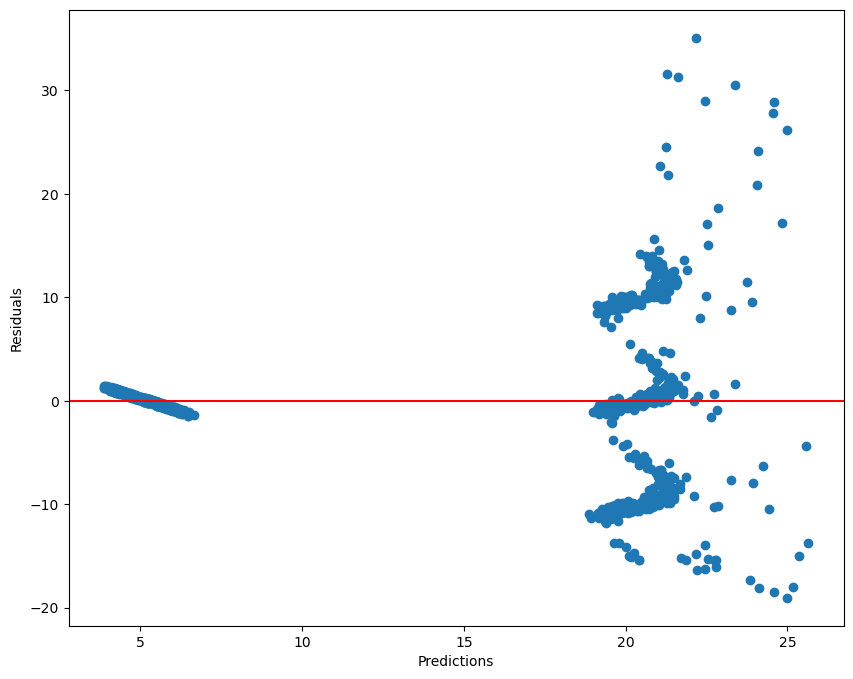

In [163]:
# my best model is the bayes regression ans so I will use it to make predictions on the test_2.csv file. Before that, plot residuals
# Plotting residuals
plt.figure(figsize=(10, 8))
plt.scatter(x=bayes_predictions, y=y_test - bayes_predictions)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()



In [164]:
# with my test_df as my X, predict the shipping time
bayes_test_predictions = bayes_model.predict(test_df)

# print the predictions
print(bayes_test_predictions)

[ 5.30096977  4.86433048  4.79073452 ... 22.67933239 23.81081131
 21.59474882]


In [165]:
bayes_test_predictions = pd.DataFrame(pd.read_csv('test_2.csv')['shipment_id'])
bayes_test_predictions['shipping_time'] = bayes_test_predictions

# print the df shape
print(bayes_test_predictions.shape)

# print the df head
bayes_test_predictions.head()

(1260, 2)


,shipment_id,shipping_time
0,S002736,S002736
1,S002738,S002738
2,S005739,S005739
3,S008722,S008722
4,S009737,S009737


In [166]:
# save the df as a csv file called submission_2.csv
bayes_test_predictions.to_csv('submission_2.csv', index=False)